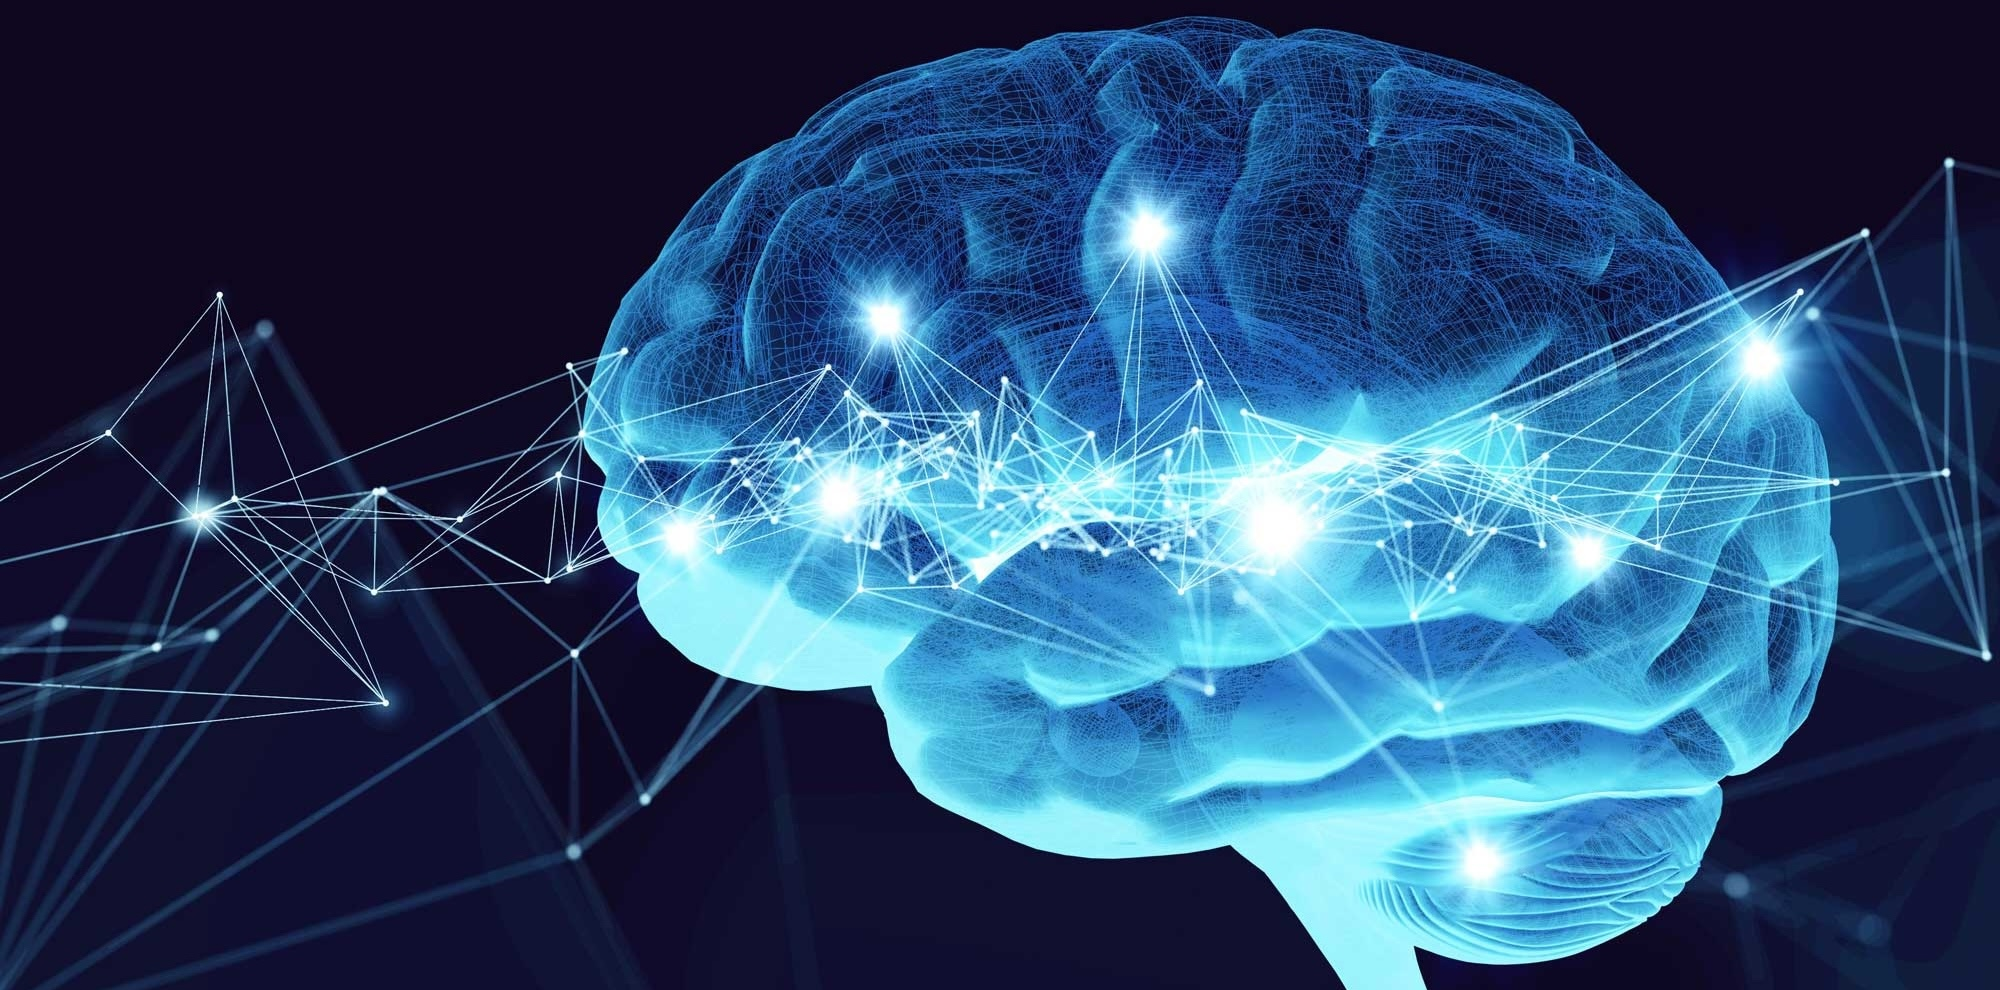

<h1>0 | Import Libraries</h1>

In [3]:
import pandas as pd                                                                                # Handling
import numpy as np
from scipy.stats import stats, zscore

import matplotlib.pyplot as plt                                                                    # Visualization
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder                       # Preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score                # Train-Test Split & Model Selection

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet                        # ML Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.multioutput import MultiOutputRegressor

import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error

pd.set_option('display.max_columns', None)

# 1 | Load Data

In [5]:
def load_data(filepath):
    """Load dataset from CSV file"""
    return pd.read_csv(filepath)

df = load_data("sleep_deprivation_dataset_detailed.csv")

# 2 | Explore Data

In [7]:
def explore_data(df):
    """Initial EDA"""
    print(df.info())
    display(df.head())
    print("\nSummary Statistics:")
    display(df.describe())
    print("\nMissing Values:")
    print(df.isnull().sum()/len(df)*100)
    print("\nDuplicated Values:")
    print(df.duplicated().sum())
    duplicates = df.duplicated().sum()
    percentage = df.duplicated().sum() / df.shape[0] * 100
    print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')
    print (f"\nShape: {df.shape}")
    
explore_data(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Participant_ID             60 non-null     object 
 1   Sleep_Hours                60 non-null     float64
 2   Sleep_Quality_Score        60 non-null     int64  
 3   Daytime_Sleepiness         60 non-null     int64  
 4   Stroop_Task_Reaction_Time  60 non-null     float64
 5   N_Back_Accuracy            60 non-null     float64
 6   Emotion_Regulation_Score   60 non-null     int64  
 7   PVT_Reaction_Time          60 non-null     float64
 8   Age                        60 non-null     int64  
 9   Gender                     60 non-null     object 
 10  BMI                        60 non-null     float64
 11  Caffeine_Intake            60 non-null     int64  
 12  Physical_Activity_Level    60 non-null     int64  
 13  Stress_Level               60 non-null     int64  
d

,Participant_ID,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,Gender,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
0,P1,5.25,15,12,1.60,64.20,12,365.85,35,Female,30.53,2,1,33
1,P2,8.70,12,14,2.54,65.27,21,288.95,20,Male,27.28,3,8,37
2,P3,7.39,17,10,3.40,74.28,35,325.93,18,Male,30.00,1,2,32
3,P4,6.59,14,3,3.54,72.42,25,276.86,18,Male,34.47,5,0,23
4,P5,3.94,20,12,3.09,99.72,60,383.45,36,Male,29.70,3,4,14



Summary Statistics:


,Sleep_Hours,Sleep_Quality_Score,Daytime_Sleepiness,Stroop_Task_Reaction_Time,N_Back_Accuracy,Emotion_Regulation_Score,PVT_Reaction_Time,Age,BMI,Caffeine_Intake,Physical_Activity_Level,Stress_Level
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,75.005833,38.1500,332.539000,29.516667,27.329333,2.383333,4.116667,17.866667
std,1.832357,5.637320,7.577845,0.827368,13.671457,17.1334,87.800288,8.168753,4.541382,1.688362,3.108717,11.015346
min,3.120000,0.000000,0.000000,1.600000,50.900000,10.0000,201.560000,18.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,64.620000,25.0000,257.535000,21.750000,23.580000,1.000000,1.000000,8.750000
50%,5.690000,8.000000,11.500000,3.260000,74.270000,37.0000,327.210000,28.500000,27.365000,2.500000,4.000000,17.500000
75%,7.285000,13.000000,19.000000,3.965000,85.600000,54.2500,402.845000,36.000000,30.747500,4.000000,6.000000,26.250000
max,8.820000,20.000000,24.000000,4.490000,99.730000,67.0000,494.550000,43.000000,34.930000,5.000000,10.000000,40.000000



Missing Values:
Participant_ID               0.0
Sleep_Hours                  0.0
Sleep_Quality_Score          0.0
Daytime_Sleepiness           0.0
Stroop_Task_Reaction_Time    0.0
N_Back_Accuracy              0.0
Emotion_Regulation_Score     0.0
PVT_Reaction_Time            0.0
Age                          0.0
Gender                       0.0
BMI                          0.0
Caffeine_Intake              0.0
Physical_Activity_Level      0.0
Stress_Level                 0.0
dtype: float64

Duplicated Values:
0
0 rows contain duplicates amounting to 0.0% of the total data.

Shape: (60, 14)


# 3 | Data Preprocessing

#### Renaming and Ordering Columns

In [10]:
df.columns

Index(['Participant_ID', 'Sleep_Hours', 'Sleep_Quality_Score',
       'Daytime_Sleepiness', 'Stroop_Task_Reaction_Time', 'N_Back_Accuracy',
       'Emotion_Regulation_Score', 'PVT_Reaction_Time', 'Age', 'Gender', 'BMI',
       'Caffeine_Intake', 'Physical_Activity_Level', 'Stress_Level'],
      dtype='object')

In [11]:
desired_order = ['Participant_ID', 'Sleep_Hours', 'Sleep_Quality_Score', 'Daytime_Sleepiness', 
                 'Stroop_Task_Reaction_Time', 'PVT_Reaction_Time', 'N_Back_Accuracy', 'Emotion_Regulation_Score',
                 'Age', 'Gender', 'BMI', 'Caffeine_Intake', 'Stress_Level', 'Physical_Activity_Level']

df = df[desired_order]

df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

column_mapping = {
    'participant_id': 'id',
    'sleep_hours': 'sleep_hrs',
    'sleep_quality_score': 'sleep_quality',
    'daytime_sleepiness': 'daytime_sleepiness',
    'stroop_task_reaction_time': 'stroop_time',
    'pvt_reaction_time': 'alertness_time',
    'n_back_accuracy': 'working_memory',
    'emotion_regulation_score':'emotion_regulation',
    'age': 'age',
    'gender': 'gender',
    'bmi': 'BMI',
    'caffeine_intake': 'caffeine_intake',
    'stress_level': 'stress_level',
    'physical_activity_level': 'movement'
}
df.rename(columns=column_mapping, inplace=True)

In [12]:
df['id'] = df['id'].str.extract(r'(\d+)').astype(int)
df = df.set_index("id", verify_integrity=True)

#### Nulls

In [14]:
df.isnull().sum()

sleep_hrs             0
sleep_quality         0
daytime_sleepiness    0
stroop_time           0
alertness_time        0
working_memory        0
emotion_regulation    0
age                   0
gender                0
BMI                   0
caffeine_intake       0
stress_level          0
movement              0
dtype: int64

#### Duplicated

In [16]:
df.duplicated().sum()

0

#### Outliers

In [18]:
def outlier_percentage_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return (outliers.sum() / len(df)) * 100 

outlier_percentages = outlier_percentage_iqr(df.select_dtypes(include=[np.number]))
print(outlier_percentages)

sleep_hrs             0.0
sleep_quality         0.0
daytime_sleepiness    0.0
stroop_time           0.0
alertness_time        0.0
working_memory        0.0
emotion_regulation    0.0
age                   0.0
BMI                   0.0
caffeine_intake       0.0
stress_level          0.0
movement              0.0
dtype: float64


In [19]:
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
outliers_z = (z_scores.abs() > 3).sum() / len(df) * 100
print(outliers_z)

sleep_hrs             0.0
sleep_quality         0.0
daytime_sleepiness    0.0
stroop_time           0.0
alertness_time        0.0
working_memory        0.0
emotion_regulation    0.0
age                   0.0
BMI                   0.0
caffeine_intake       0.0
stress_level          0.0
movement              0.0
dtype: float64


#### Data Types

In [21]:
df.dtypes

sleep_hrs             float64
sleep_quality           int64
daytime_sleepiness      int64
stroop_time           float64
alertness_time        float64
working_memory        float64
emotion_regulation      int64
age                     int64
gender                 object
BMI                   float64
caffeine_intake         int64
stress_level            int64
movement                int64
dtype: object

# 4 | Feature Engineering

###  Handling Categorical Features

>#### Label encoding

In [25]:
df['gender'] = df['gender'].map( {'Female': 1, 'Male': 0}).astype(int)

# 5 | EDA

In [27]:
display(df.describe())

,sleep_hrs,sleep_quality,daytime_sleepiness,stroop_time,alertness_time,working_memory,emotion_regulation,age,gender,BMI,caffeine_intake,stress_level,movement
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,5.805500,8.316667,12.000000,3.245000,332.539000,75.005833,38.1500,29.516667,0.383333,27.329333,2.383333,17.866667,4.116667
std,1.832357,5.637320,7.577845,0.827368,87.800288,13.671457,17.1334,8.168753,0.490301,4.541382,1.688362,11.015346,3.108717
min,3.120000,0.000000,0.000000,1.600000,201.560000,50.900000,10.0000,18.000000,0.000000,18.740000,0.000000,0.000000,0.000000
25%,4.107500,4.000000,6.000000,2.595000,257.535000,64.620000,25.0000,21.750000,0.000000,23.580000,1.000000,8.750000,1.000000
50%,5.690000,8.000000,11.500000,3.260000,327.210000,74.270000,37.0000,28.500000,0.000000,27.365000,2.500000,17.500000,4.000000
75%,7.285000,13.000000,19.000000,3.965000,402.845000,85.600000,54.2500,36.000000,1.000000,30.747500,4.000000,26.250000,6.000000
max,8.820000,20.000000,24.000000,4.490000,494.550000,99.730000,67.0000,43.000000,1.000000,34.930000,5.000000,40.000000,10.000000


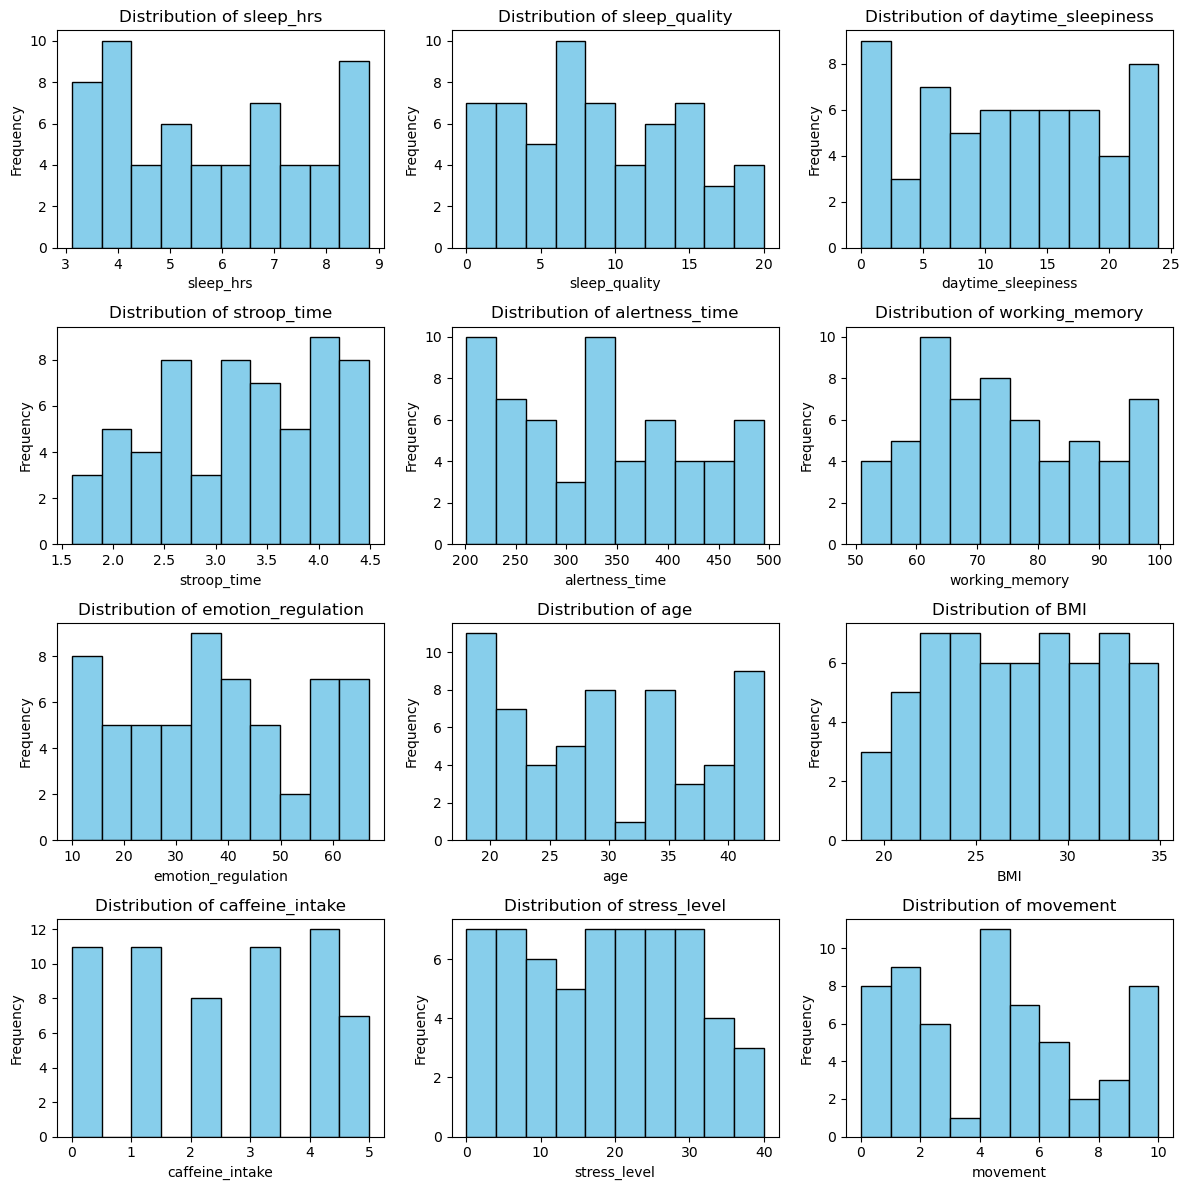

In [28]:
columns = ['sleep_hrs', 'sleep_quality', 'daytime_sleepiness', 'stroop_time', 'alertness_time', 
                     'working_memory', 'emotion_regulation', 'age', 'BMI', 'caffeine_intake', 
                     'stress_level', 'movement']
plt.figure(figsize=(12, 12))
for i, col in enumerate(columns, 1):
    plt.subplot(4, 3, i)
    plt.hist(df[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

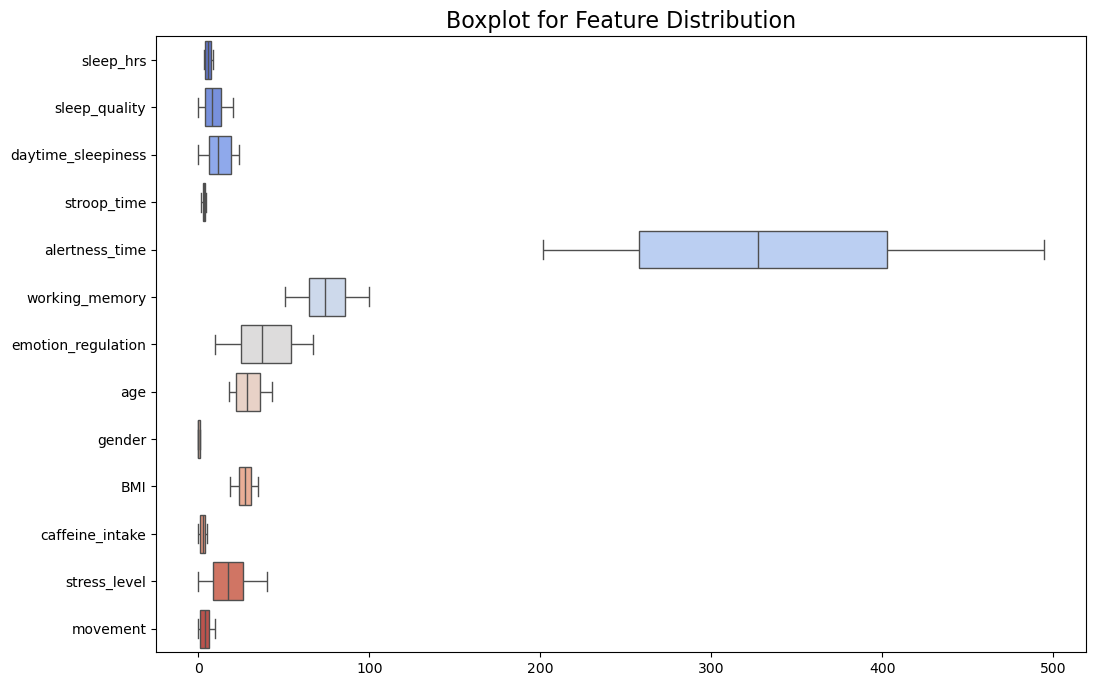

In [29]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df.select_dtypes(include=[np.number]), orient="h", palette="coolwarm") 
plt.title("Boxplot for Feature Distribution", fontsize=16)
plt.show()

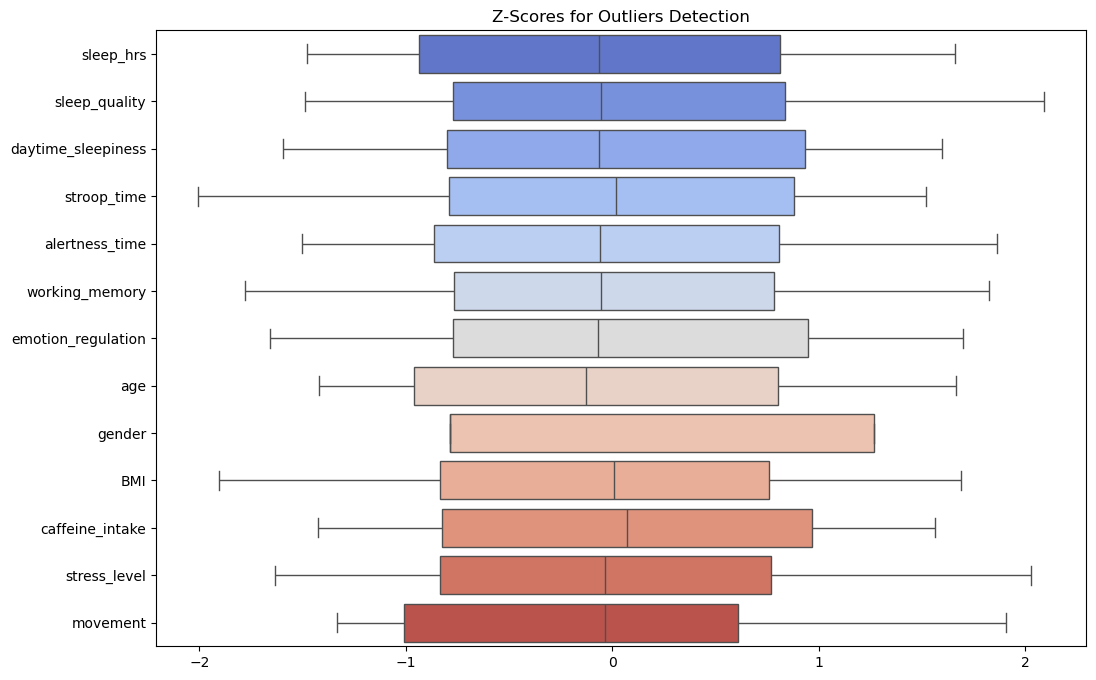

In [30]:
z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
df_z = pd.DataFrame(z_scores, columns=df.select_dtypes(include=['float64', 'int64']).columns)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_z, orient="h", palette='coolwarm')
plt.title("Z-Scores for Outliers Detection")
plt.show()

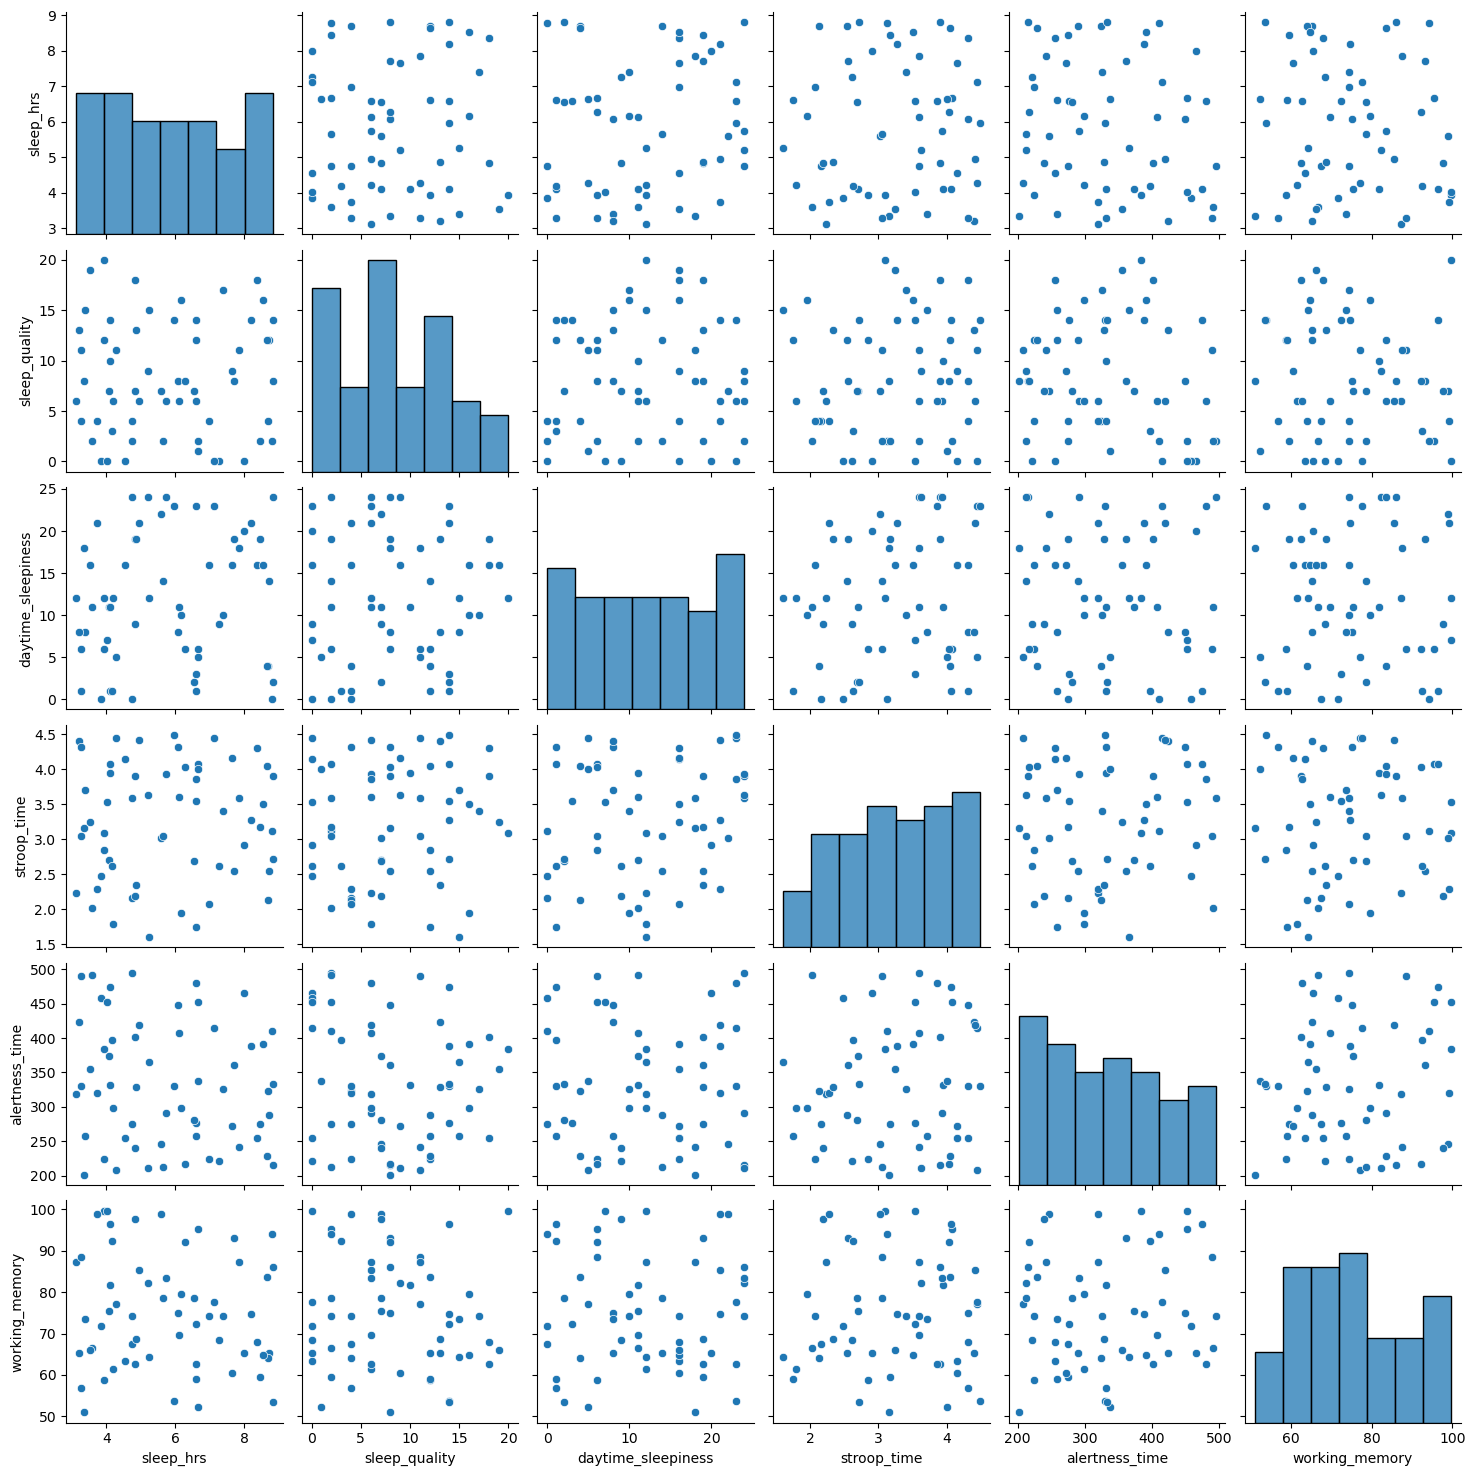

In [31]:
sns.pairplot(df[['sleep_hrs', 'sleep_quality', 'daytime_sleepiness', 'stroop_time', 'alertness_time', 'working_memory']])
plt.show()

# 6 | Feature Selection

> #### Looking for low correlation between features, but high correlation between features and our target.

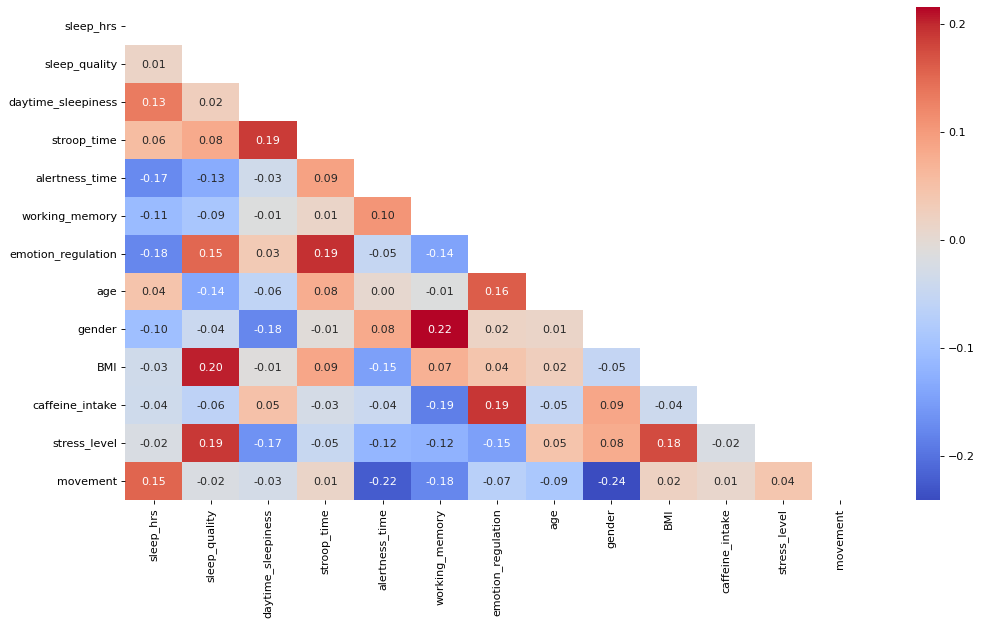

In [34]:
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix))
plt.figure(figsize=(15,8), dpi=80) 
sns.heatmap(corr_matrix, annot=True, mask=mask, fmt=".2f", cmap="coolwarm")
plt.show()

## **Insights:**
- **Sleep Hours:** has a moderate negative correlation with Sleep_Hours, suggesting that higher sleep hours may not significantly improve emotion regulation. More sleep may have a slight effect on faster reaction times.
- **Sleep quality** seems to have a more direct impact on emotional regulation and cognitive performance than just sleep hours alone.
- **Cognitive Performance:**
     - Stroop_Task_Reaction_Time and Emotion_Regulation_Score have a moderate positive correlation, indicating that people who perform better on the Stroop task also tend to have higher emotion regulation scores.
     - Alertness and Daytime_Sleepiness show a moderate negative correlation, suggesting that higher daytime sleepiness is slightly linked to slower reaction times.
- **Stress levels** appear to influence both sleep quality and emotion regulation.
- **Caffeine intake** could potentially play a role in emotion regulation, but the relationship is modest.
- **Physical activity** seems only weakly connected to the other variables, although it has a slight relationship with stress levels.

# 7 | First Try Modeling

In [37]:
features = ['sleep_hrs', 'sleep_quality', 'daytime_sleepiness', 
            'age', 'BMI', 'caffeine_intake', 'stress_level', 'movement']

# emotion_regulation
X = df[features]
y_emotion = df['emotion_regulation']

X_train, X_test, y_train, y_test = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

model_emotion = RandomForestRegressor(n_estimators=100, random_state=42)
model_emotion.fit(X_train, y_train)

y_pred_emotion = model_emotion.predict(X_test)
print("Emotion Regulation Prediction MAE:", mean_absolute_error(y_test, y_pred_emotion))
print("Emotion Regulation - Train R²:", model_emotion.score(X_train, y_train))
print("Emotion Regulation - Test R²:", model_emotion.score(X_test, y_test))

# working_memory
y_working_memory = df['working_memory']

X_train, X_test, y_train, y_test = train_test_split(X, y_working_memory, test_size=0.2, random_state=42)

model_working_memory = RandomForestRegressor(n_estimators=100, random_state=42)
model_working_memory.fit(X_train, y_train)

y_pred_working_memory = model_working_memory.predict(X_test)
print("Working Memory Prediction MAE:", mean_absolute_error(y_test, y_pred_working_memory))
print("Working Memory - Train R²:", model_working_memory.score(X_train, y_train))
print("Working Memory - Test R²:", model_working_memory.score(X_test, y_test))

# alertness_time
y_alertness = df['alertness_time']

X_train, X_test, y_train, y_test = train_test_split(X, y_alertness, test_size=0.2, random_state=42)

model_alertness = RandomForestRegressor(n_estimators=100, random_state=42)
model_alertness.fit(X_train, y_train)

y_pred_alertness = model_alertness.predict(X_test)
print("Alertness Time Prediction MAE:", mean_absolute_error(y_test, y_pred_alertness))
print("Alertness Time - Train R²:", model_alertness.score(X_train, y_train))
print("Alertness Time - Test R²:", model_alertness.score(X_test, y_test))

# stroop_time
y_stroop = df['stroop_time']

X_train, X_test, y_train, y_test = train_test_split(X, y_stroop, test_size=0.2, random_state=42)

model_stroop = RandomForestRegressor(n_estimators=100, random_state=42)
model_stroop.fit(X_train, y_train)

y_pred_stroop = model_stroop.predict(X_test)
print("Stroop Time Prediction MAE:", mean_absolute_error(y_test, y_pred_stroop))
print("Stroop Time - Train R²:", model_stroop.score(X_train, y_train))
print("Stroop Time - Test R²:", model_stroop.score(X_test, y_test))

Emotion Regulation Prediction MAE: 16.0825
Emotion Regulation - Train R²: 0.8447496336056298
Emotion Regulation - Test R²: -0.08793148340592993
Working Memory Prediction MAE: 13.221875000000006
Working Memory - Train R²: 0.8010952196865501
Working Memory - Test R²: -0.16276441392947083
Alertness Time Prediction MAE: 85.78823333333338
Alertness Time - Train R²: 0.8612527476344316
Alertness Time - Test R²: -0.24227504156208624
Stroop Time Prediction MAE: 0.8670749999999998
Stroop Time - Train R²: 0.8314462607416968
Stroop Time - Test R²: -0.22980121585227997


In [38]:
features = ['sleep_hrs', 'sleep_quality', 'daytime_sleepiness', 
            'age', 'BMI', 'caffeine_intake', 'stress_level', 'movement']

# emotion_regulation
X = df[features]
y_emotion = df['emotion_regulation']

X_train, X_test, y_train, y_test = train_test_split(X, y_emotion, test_size=0.2, random_state=42)

model_emotion = XGBRegressor(n_estimators=100, random_state=42)
model_emotion.fit(X_train, y_train)

y_pred_emotion = model_emotion.predict(X_test)
print("Emotion Regulation Prediction MAE:", mean_absolute_error(y_test, y_pred_emotion))
print("Emotion Regulation - Train R²:", model_emotion.score(X_train, y_train))
print("Emotion Regulation - Test R²:", model_emotion.score(X_test, y_test))

# working_memory
y_working_memory = df['working_memory']

X_train, X_test, y_train, y_test = train_test_split(X, y_working_memory, test_size=0.2, random_state=42)

model_working_memory = XGBRegressor(n_estimators=100, random_state=42)
model_working_memory.fit(X_train, y_train)

y_pred_working_memory = model_working_memory.predict(X_test)
print("Working Memory Prediction MAE:", mean_absolute_error(y_test, y_pred_working_memory))
print("Working Memory - Train R²:", model_working_memory.score(X_train, y_train))
print("Working Memory - Test R²:", model_working_memory.score(X_test, y_test))

# alertness_time
y_alertness = df['alertness_time']

X_train, X_test, y_train, y_test = train_test_split(X, y_alertness, test_size=0.2, random_state=42)

model_alertness = XGBRegressor(n_estimators=100, random_state=42)
model_alertness.fit(X_train, y_train)

y_pred_alertness = model_alertness.predict(X_test)
print("Alertness Time Prediction MAE:", mean_absolute_error(y_test, y_pred_alertness))
print("Alertness Time - Train R²:", model_alertness.score(X_train, y_train))
print("Alertness Time - Test R²:", model_alertness.score(X_test, y_test))

# stroop_time
y_stroop = df['stroop_time']

X_train, X_test, y_train, y_test = train_test_split(X, y_stroop, test_size=0.2, random_state=42)

model_stroop = XGBRegressor(n_estimators=100, random_state=42)
model_stroop.fit(X_train, y_train)

y_pred_stroop = model_stroop.predict(X_test)
print("Stroop Time Prediction MAE:", mean_absolute_error(y_test, y_pred_stroop))
print("Stroop Time - Train R²:", model_stroop.score(X_train, y_train))
print("Stroop Time - Test R²:", model_stroop.score(X_test, y_test))

Emotion Regulation Prediction MAE: 16.608922561009724
Emotion Regulation - Train R²: 1.0
Emotion Regulation - Test R²: -0.24648070335388184
Working Memory Prediction MAE: 13.285866966247555
Working Memory - Train R²: 0.999999998042236
Working Memory - Test R²: -0.4838012252972652
Alertness Time Prediction MAE: 92.31449523925784
Alertness Time - Train R²: 0.9999999999406772
Alertness Time - Test R²: -0.4544243754595463
Stroop Time Prediction MAE: 0.7735395606358845
Stroop Time - Train R²: 0.9999990155672718
Stroop Time - Test R²: -0.10105523668727279


# 8 | Feature Scaling

### Standardization (Z-score Normalization)

In [41]:
features = ['sleep_hrs', 'sleep_quality', 'daytime_sleepiness', 
            'age', 'BMI', 'caffeine_intake', 'stress_level', 'movement']

X = df[features]
y= df['emotion_regulation']

In [42]:
scaler = StandardScaler().fit(X_train) 

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

display (X_train_scaled.head())
display( X_test_scaled.head())

,sleep_hrs,sleep_quality,daytime_sleepiness,age,BMI,caffeine_intake,stress_level,movement
0,-0.935048,-1.444623,-0.723153,-0.368371,0.090943,-0.203595,0.680171,0.636824
1,0.460060,0.970269,-1.255127,-1.317729,1.571631,1.628757,0.584987,-1.314296
2,1.572890,0.625285,-1.122133,0.462318,-1.760464,-0.814379,-0.366856,0.636824
3,0.221209,1.315254,-0.324172,0.224978,1.242589,-1.425162,1.536830,1.612383
4,0.470917,0.625285,-1.521114,-1.080390,-0.453072,0.407189,1.060909,-0.013549


,sleep_hrs,sleep_quality,daytime_sleepiness,age,BMI,caffeine_intake,stress_level,movement
0,-0.267351,1.142762,-0.058185,0.699658,0.707348,-0.203595,1.536830,-0.989109
1,-0.978476,0.625285,-0.856146,-0.131031,1.080262,0.407189,1.156093,0.636824
2,-0.495345,-0.237177,-0.457165,0.699658,0.498955,1.017973,1.060909,0.311637
3,0.671769,-0.754654,0.473790,-0.249701,0.031716,-1.425162,-1.128331,-1.314296
4,-0.799337,0.452792,-0.989140,-0.131031,-0.126224,-0.814379,-0.081303,0.636824


###  Min-Max Scaling (Normalization)

In [44]:
normalizer = MinMaxScaler().fit(X_train)

X_train_norm = pd.DataFrame(normalizer.transform(X_train), columns=X_train.columns)
X_test_norm = pd.DataFrame(normalizer.transform(X_test), columns=X_test.columns)

display (X_train_norm.head())
display( X_test_norm.head())

,sleep_hrs,sleep_quality,daytime_sleepiness,age,BMI,caffeine_intake,stress_level,movement
0,0.157895,0.0,0.291667,0.32,0.554663,0.4,0.605263,0.6
1,0.608772,0.7,0.125000,0.00,0.971587,1.0,0.578947,0.0
2,0.968421,0.6,0.166667,0.60,0.033354,0.2,0.315789,0.6
3,0.531579,0.8,0.416667,0.52,0.878938,0.0,0.842105,0.9
4,0.612281,0.6,0.041667,0.08,0.401482,0.6,0.710526,0.4


,sleep_hrs,sleep_quality,daytime_sleepiness,age,BMI,caffeine_intake,stress_level,movement
0,0.373684,0.75,0.500000,0.68,0.728227,0.4,0.842105,0.1
1,0.143860,0.60,0.250000,0.40,0.833230,0.6,0.736842,0.6
2,0.300000,0.35,0.375000,0.68,0.669549,0.8,0.710526,0.5
3,0.677193,0.20,0.666667,0.36,0.537986,0.0,0.105263,0.0
4,0.201754,0.55,0.208333,0.40,0.493515,0.2,0.394737,0.6


# 9 |  Model Training & Evaluation

## Regression Models

#### KNN Regressor

In [48]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_norm, y_train)

pred_train = knn.predict(X_train_norm)
pred_test = knn.predict(X_test_norm)

print("R² score (Train):", knn.score(X_train_norm, y_train))
print("R² score (Test):", knn.score(X_test_norm, y_test))
print("MAE (Test):", mean_absolute_error(y_test, pred_test))
print("RMSE (Test):", root_mean_squared_error(y_test, pred_test))

R² score (Train): 0.1679579391149708
R² score (Test): -0.6545360490921586
MAE (Test): 0.9478333333333335
RMSE (Test): 1.078825750526933


#### Linear Regression Z-score Normalized

In [50]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
pred_train = lin_reg.predict(X_train_scaled)
pred_test = lin_reg.predict(X_test_scaled)

print("R² score (Train):", lin_reg.score(X_train_scaled, y_train))
print("R² score (Test):", lin_reg.score(X_test_scaled, y_test))
print("MAE (Test):", mean_absolute_error(y_test, pred_test))
print("RMSE (Test):", root_mean_squared_error(y_test, pred_test))

R² score (Train): 0.08457009982774288
R² score (Test): -0.4476009475891518
MAE (Test): 0.9004238836629602
RMSE (Test): 1.0091079239242033


In [51]:
lin_reg_coef_scaled = {feature : coef for feature, coef in zip(X_train_scaled.columns, lin_reg.coef_)}
lin_reg_coef_scaled

{'sleep_hrs': 0.06444536367194335,
 'sleep_quality': 0.06867589088296597,
 'daytime_sleepiness': 0.14298399975604975,
 'age': 0.0685490797886731,
 'BMI': 0.08282685895096907,
 'caffeine_intake': 0.03156475876300934,
 'stress_level': -0.030685346041625854,
 'movement': 0.004140867629872576}